# SPEECH To EMOTION RECOGNITION

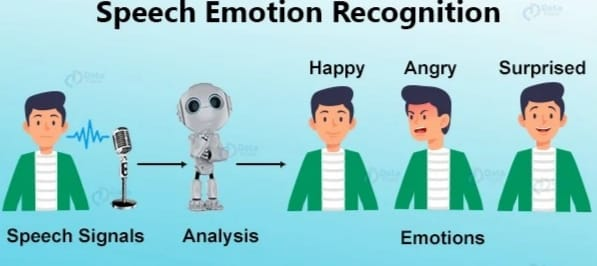

In [1]:
from IPython.display import Image
Image("SER.png")

# Loading Libraries

In [2]:
import numpy as np
import pandas as pd 
import os

In [3]:
import pandas as pd
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write
import wavio as wv

# Loading a audio

In [4]:
x,sr = librosa.load(r"C:\Users\HP\Downloads\SER\SER\speech-emotion-recognition-ravdess-data\Actor_01\03-01-01-01-01-01-01.wav")

In [5]:
sf.write('stereo_file.wav', np.random.randn(10, 2), 44100, 'PCM_24')
Audio(data=x, rate=sr)

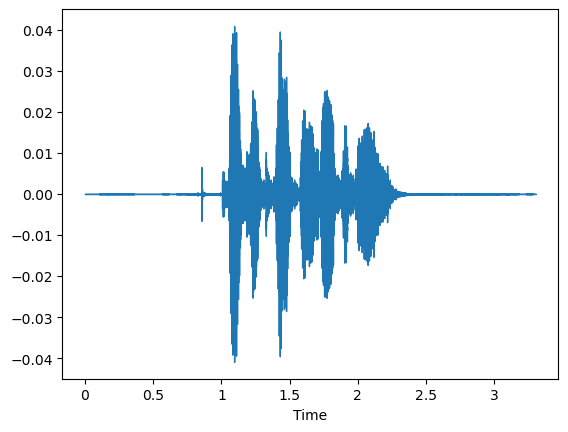

In [6]:
librosa.display.waveshow(x,sr=sr)

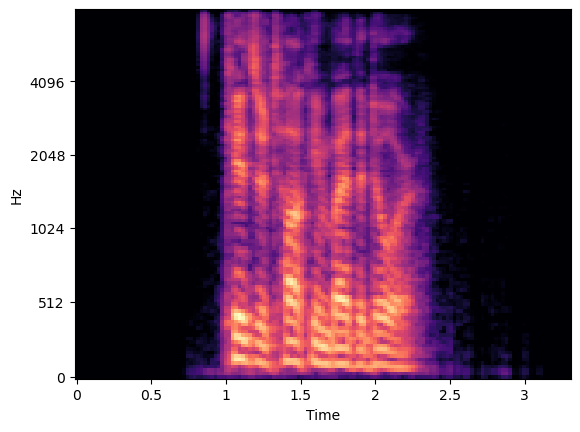

In [7]:
spectrogram=librosa.feature.melspectrogram(y=x,sr=sr,n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');

# Feature Preprocessing

In [8]:
# Data Preprocessing 
# Silence Removal
# Taking window of 4 and if number of zero croasigs are greater than 2,we dont include amplitudes in this wondow
def zero_crossing(x):
    zero_crossings=[]
    silence_removed=[]
    silence_removed=np.array(silence_removed)
    for i  in range(1,len(x)):
        # detecting zero crossing
        if(x[i-1]<=0 and x[i]>0):
            zero_crossings.append(1)
        else:
            zero_crossings.append(0)
    for i in range(len(zero_crossings)-3):
        zeros=np.sum(zero_crossings[4*i:4*(i+1)])
        #print(zeros)
        zeros=4-zeros
        if(zeros>2):
            silence_removed=np.concatenate((silence_removed,np.array(x[4*i:4*(i+1)])))
    print("Before Silence Removal : ",len(x),"\nAfter Silence Removal : ",len(silence_removed))
    return silence_removed

In [9]:
silence_removed=zero_crossing(x)

Before Silence Removal :  72839 
After Silence Removal :  64443


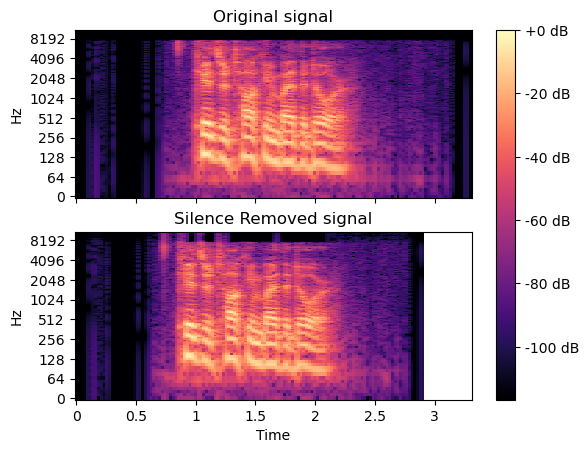

In [10]:
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(silence_removed)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Silence Removed signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

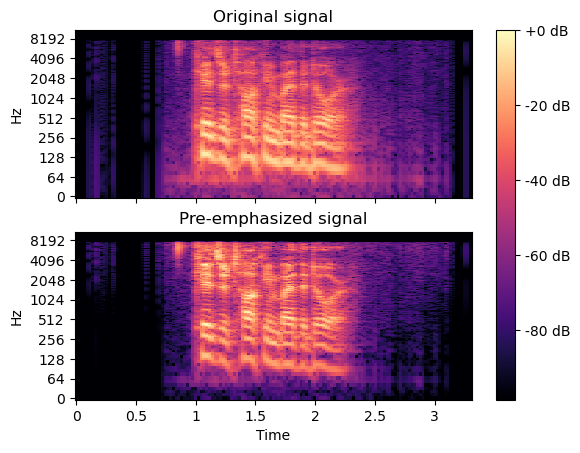

In [11]:
#Pre-emphasis
y_filt = librosa.effects.preemphasis(x)
# and plot the results for comparison
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Pre-emphasized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

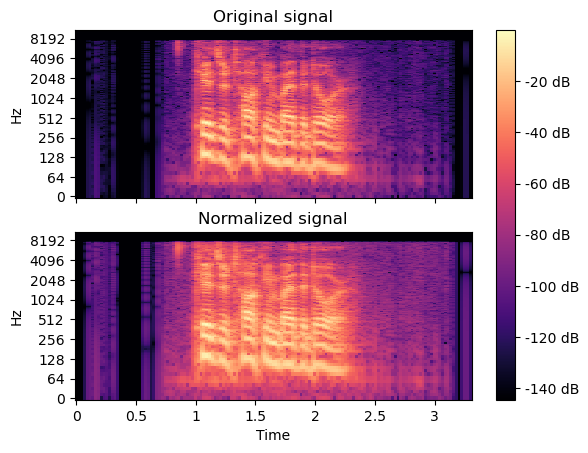

In [12]:
#Normalization
x_norm=x/max(x)
S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max, top_db=None)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_norm)), ref=np.max, top_db=None)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Original signal')
ax[0].label_outer()
img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Normalized signal')
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [13]:
def preprocessing(file):
    X,sample_rate = librosa.load(file)
    # zero crossing
    #silence_removed=zero_crossing(X)
    # Pre emphasis
    y_filt = librosa.effects.preemphasis(X)
    # normalization
    #x_norm=y_filt/max(y_filt)
    return y_filt,sample_rate

# Feature Extraction

In [14]:
# All the types of emotions that are present
emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}

In [15]:
# Feature extraction using librosa a python package for audio analysis 
# Chroma features

def feature_extraction(X,sample_rate):
    result = np.array([])

    # chroma stft: Compute a chromagram from a waveform or power spectrum
    stft = np.abs(librosa.stft(X))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))
    
    # mfcc: Mel-frequency cepstral coefficients
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))
    
    # melspectogram: Compute a mel-scaled spectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
    result=np.hstack((result, mel))
    
    return result

In [16]:
from glob import glob
files_audio = glob(r"C:\Users\HP\Downloads\SER\SER\speech-emotion-recognition-ravdess-data\Actor_*\\*.wav")

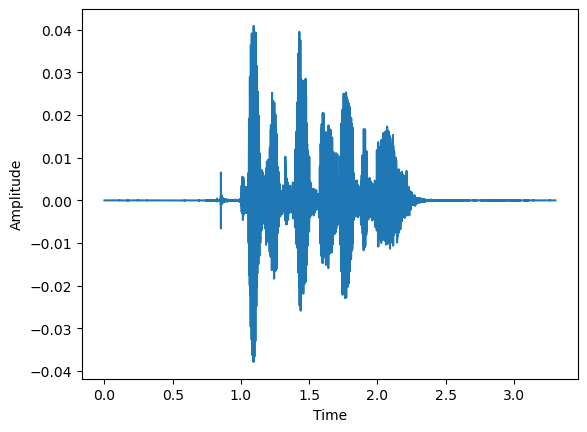

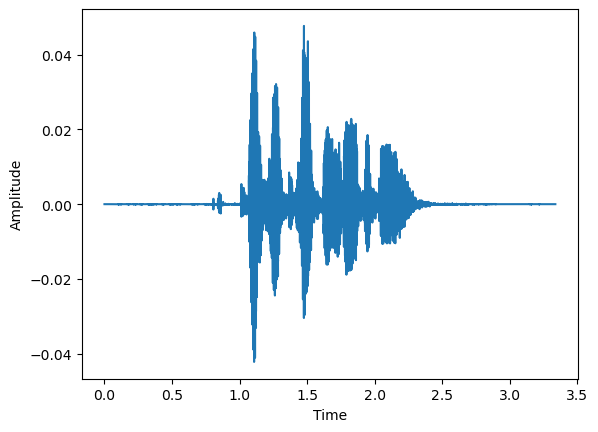

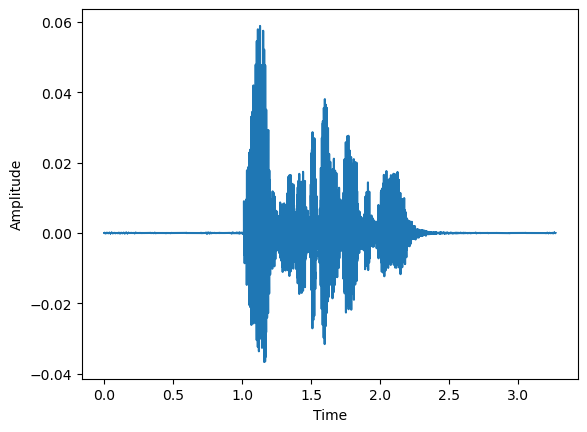

In [17]:
import matplotlib.pyplot as plt

for i in range(3):
    audio,sfreq = librosa.load(files_audio[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [18]:
# Read File name identifiers and load data values

x,y=[],[]
# Considered the following emotions
emotions=['happy','sad','angry','fearful','disgust']

from IPython.display import clear_output
e = set()

for file in files_audio:
        clear_output(wait=True)
        file_name = file.split('\\')[-1]
        emotion=emotions_all[file_name.split("-")[2]]
        if emotion not in emotions:
            continue
        e.add(file.split('\\')[-2])
        # preprocessing audio data
        pre_speech=preprocessing(file)
        # feature extraction from audio
        feature=feature_extraction(pre_speech[0],pre_speech[1])
        print(e)
        x.append(feature)
        y.append(emotion)

{'Actor_13', 'Actor_08', 'Actor_16', 'Actor_17', 'Actor_19', 'Actor_09', 'Actor_02', 'Actor_22', 'Actor_14', 'Actor_07', 'Actor_21', 'Actor_18', 'Actor_05', 'Actor_24', 'Actor_15', 'Actor_01', 'Actor_20', 'Actor_10', 'Actor_04', 'Actor_12', 'Actor_11', 'Actor_23', 'Actor_06', 'Actor_03'}


In [19]:
# features of audio
x = np.array(x)

<BarContainer object of 5 artists>

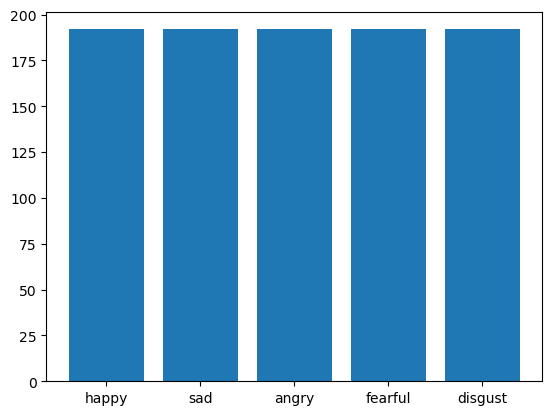

In [20]:
from collections import Counter
target_count=pd.Series(Counter(y))
plt.bar(target_count.index,target_count)

In [21]:
x.shape

(960, 160)

In [22]:
len(y)

960

In [23]:
# Encoding technique to handle categorical variables (Emotions)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [24]:
# Transform features by scaling each feature to given range
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4,shuffle=True,stratify=y)
final={}

In [26]:
# XGBClassifier: Boosting algorithm based on gradient boosted decision trees algorithm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model1=XGBClassifier()
#Training
model1.fit(x_train,y_train)
#Prediction
y_pred1=model1.predict(x_test)
print(f"XGBOOSTClassifier Accuracy : {accuracy_score(y_test,y_pred1)*100}")
final['XGBOOST']=accuracy_score(y_test,y_pred1)*100

XGBOOSTClassifier Accuracy : 67.1875


In [27]:
# LGBMClassifier: Light gradient boosting
import lightgbm as lgb
#from lightgbm import LightGBMClassifier
model2 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model2.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],eval_metric='logloss')    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002891 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40800
[LightGBM] [Info] Number of data points in the train set: 768, number of used features: 160
[LightGBM] [Info] Start training from score -1.606837
[LightGBM] [Info] Start training from score -1.606837
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Info] Start training from score -1.606837
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [28]:
y_pred2=model2.predict(x_test)
print(f"LGBMClassifier Accuracy:{accuracy_score(y_test,y_pred2)*100}")
final['LGBM']=accuracy_score(y_test,y_pred2)*100

LGBMClassifier Accuracy:68.75


In [29]:
# RandomForestClassifier: Ensemble learning method for classification
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(max_depth=3, random_state=0)
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
print(f"RandomForestClassifier Accuracy: {accuracy_score(y_test,y_pred3)*100}")
final['RandomForest']=accuracy_score(y_test,y_pred3)*100

RandomForestClassifier Accuracy: 46.35416666666667


In [30]:
# MLPClassifier: Multi layer perceptron classifier
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,100), learning_rate='adaptive', max_iter=1000)
model.fit(x_train,y_train)
y_pred4=model.predict(x_test)
print(f"MLPClassifier Accuracy: {accuracy_score(y_test,y_pred4)*100}")
final['MLPClassifier']=accuracy_score(y_test,y_pred4)*100

MLPClassifier Accuracy: 63.020833333333336


In [31]:
#KNNClassifier:K-nearest Neighbors Classification Model
import sklearn
from sklearn.neighbors import KNeighborsClassifier
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)
scores = []

In [32]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred5 = knn.predict(x_test)
    scores.append(sklearn.metrics.accuracy_score(y_test,y_pred5)*100)
final['KNN']=sklearn.metrics.accuracy_score(y_test,y_pred5)*100
scores

[61.458333333333336,
 59.895833333333336,
 51.041666666666664,
 54.6875,
 50.0,
 53.645833333333336,
 48.95833333333333,
 52.604166666666664,
 52.083333333333336,
 51.041666666666664,
 48.95833333333333,
 50.520833333333336,
 51.041666666666664,
 51.5625,
 52.083333333333336,
 54.166666666666664,
 52.083333333333336,
 51.041666666666664,
 50.520833333333336,
 49.47916666666667,
 51.041666666666664,
 48.4375,
 47.39583333333333,
 49.47916666666667,
 50.520833333333336]

Text(0, 0.5, 'Testing Accuracy')

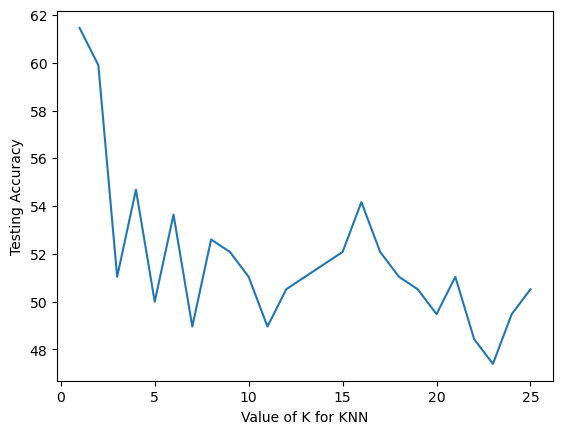

In [33]:
# allow plots to appear within the notebook
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0.5, 1.0, 'Final Report')

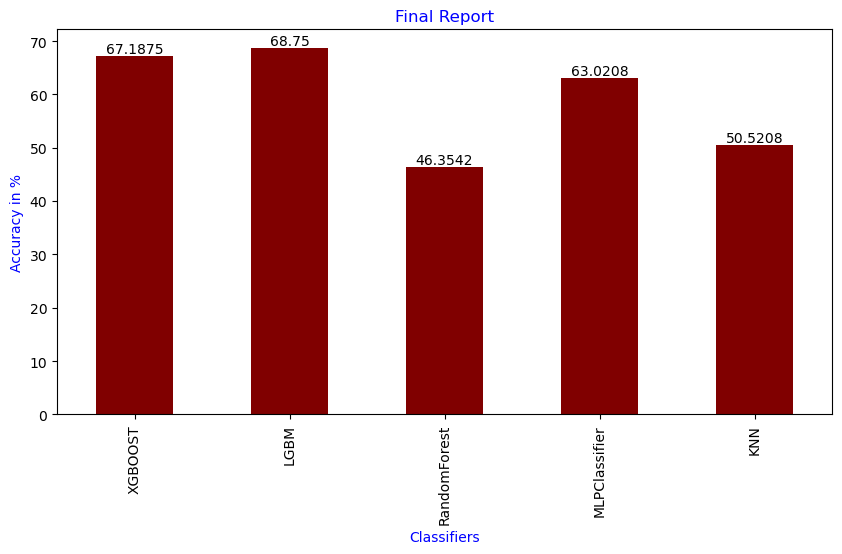

In [34]:
%matplotlib inline
courses = list(final.keys())
values = list(final.values())
Scores =values
score_series = pd.Series(Scores)
# Plot the figure.
plt.figure(figsize=(10, 5))
fig = score_series.plot(kind='bar', color ='maroon')
fig.set_xticklabels(courses)
fig.bar_label(fig.containers[0],label_type='edge')
plt.xlabel("Classifiers",color ='blue')
plt.ylabel("Accuracy in %",color ='blue')
plt.title("Final Report",color ='blue')

In [35]:
emotions_all={
    '01' : 'neutral', 
    '02' : 'calm' ,
    '03' : 'happy' ,
    '04' : 'sad' ,
    '05' : 'angry', 
    '06' : 'fearful' ,
    '07' : 'disgust', 
    '08' : 'surprised'
}

# Evaluation 

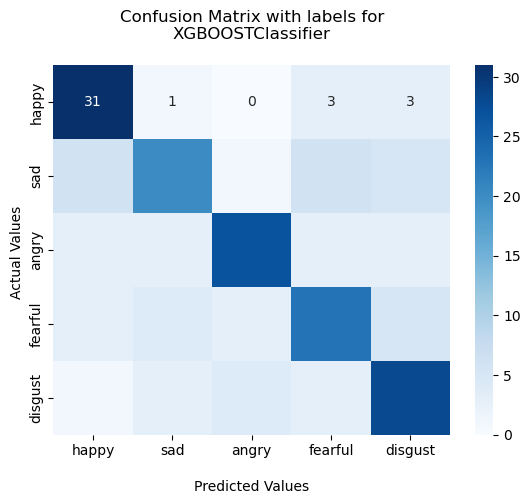

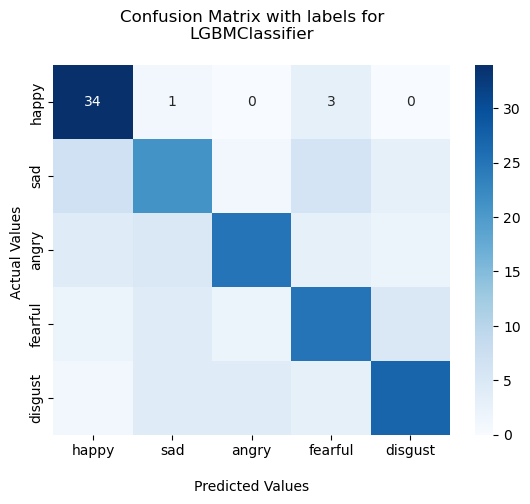

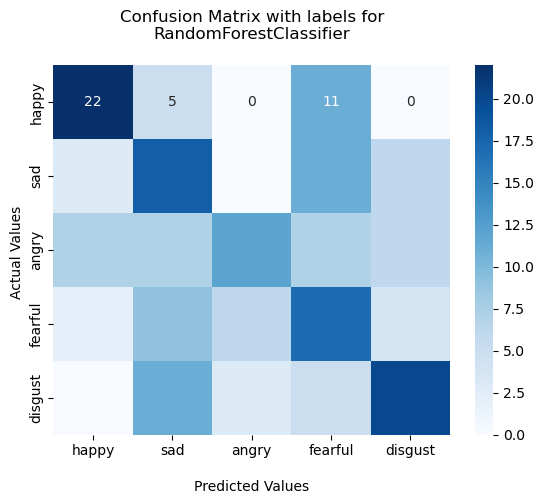

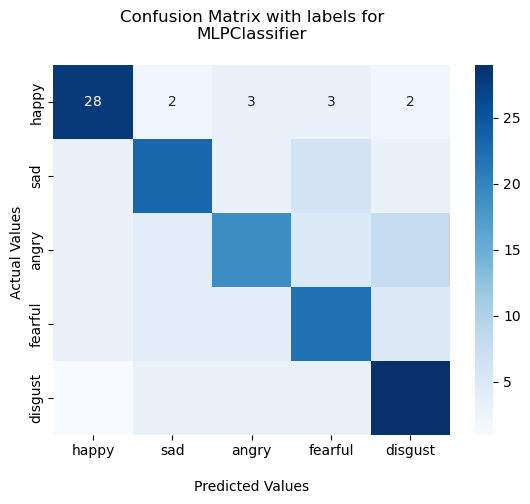

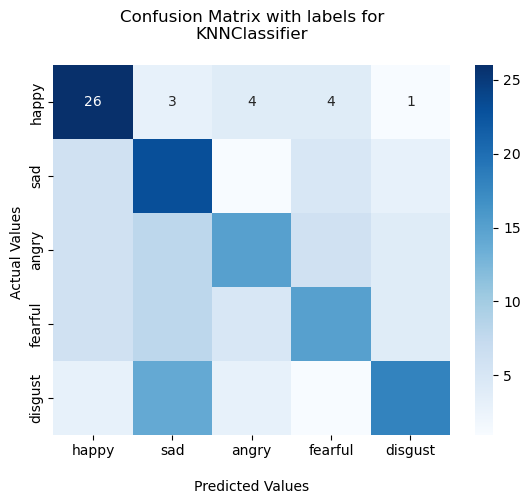

In [36]:
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(y_test,y_pred1, labels=[0,1,2,3,4])
matrix2= confusion_matrix(y_test,y_pred2, labels=[0,1,2,3,4])
matrix3= confusion_matrix(y_test,y_pred3, labels=[0,1,2,3,4])
matrix4 = confusion_matrix(y_test,y_pred4, labels=[0,1,2,3,4])
matrix5= confusion_matrix(y_test,y_pred5, labels=[0,1,2,3,4])
import seaborn as sns
classifications=['XGBOOSTClassifier','LGBMClassifier','RandomForestClassifier','MLPClassifier','KNNClassifier']
nare=0
for matrix in [matrix1,matrix2,matrix3,matrix4,matrix5]:
    ax = sns.heatmap(matrix, annot=True, cmap='Blues')
    ax.set_title(f'Confusion Matrix with labels for\n{classifications[nare]}\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    nare+=1
## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])
    ax.yaxis.set_ticklabels(['happy','sad','angry','fearful','disgust'])
## Display the visualization of the Confusion Matrix.
    plt.show()


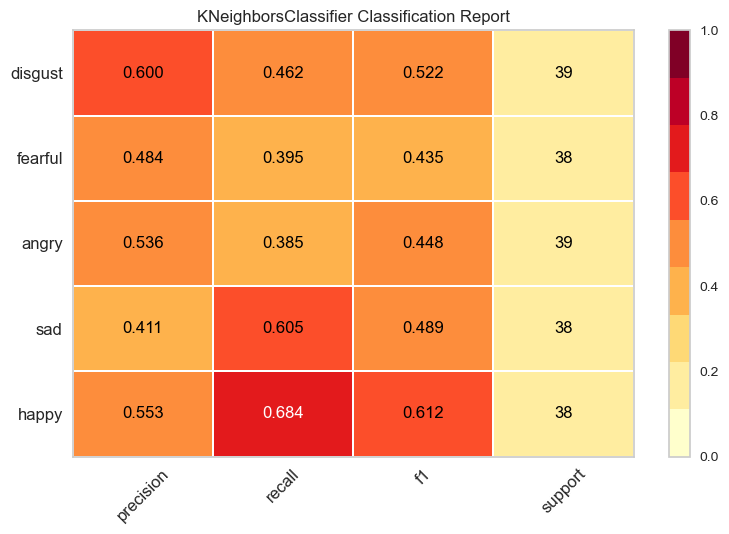

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [37]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn, classes=['happy','sad','angry','fearful','disgust'], support=True)

visualizer.fit(x_train, y_train)        # Fit the visualizer and the model
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

# Testing 

In [38]:
file_Name='03-01-07-02-02-01-12.wav'
test_audio, sr = librosa.load(r"{}".format(file_Name))
emotion=emotions_all[file_Name.split("-")[2]]
x=[]
y=[]
pre_speech=preprocessing(file_Name)
feature=feature_extraction(pre_speech[0],pre_speech[1])
x.append(feature)
y.append(emotion)
Audio(data=test_audio, rate=sr)

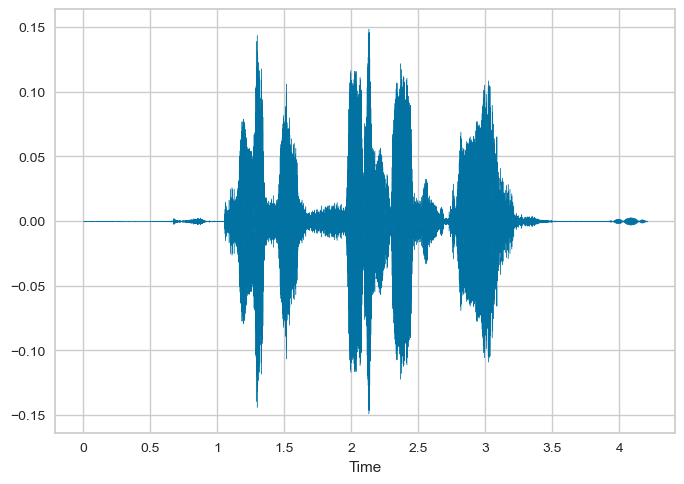

In [39]:
librosa.display.waveshow(test_audio,sr=sr)

In [40]:
import emoji
Emojis={'neutral':emoji.emojize(':neutral_face:'), 'calm':emoji.emojize(':relieved_face:'),'happy':emoji.emojize(':smiling_face_with_smiling_eyes:') ,'sad':emoji.emojize(':crying_face:') ,'angry':emoji.emojize(':enraged_face:'), 'fearful':emoji.emojize(':fearful_face:') ,'disgust':emoji.emojize(':nauseated_face:'), 'surprised':emoji.emojize(':astonished_face:')}

#                                                 Prediction

In [41]:
print(f"Predected Emotion\033[1m {emotion}: {Emojis[emotion]}")

Predected Emotion disgust: 🤢


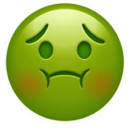

In [42]:
from IPython.display import Image
Emj={'neutral':"Reactions/Neutral.jpg", 'calm':"Reactions/Calm.jpg",'happy':"Reactions/Smile.jpg" ,'sad':"Reactions/Sad.jpg",'angry':"Reactions/Angry.jpg", 'fearful':"Reactions/Fear.jpg",'disgust':"Reactions/Disgust.jpg", 'surprised':"Reactions/Surprise.jpg"}
Image(Emj[emotion])